In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
import requests
import pickle
import re
pd.set_option('display.max_columns', None)

### Download Stock Data

In [10]:

stock_period = ('2010/01/01','2022/12/31')
stock_list = ['^TWII','0050','NFLX']

for stock in stock_list: 
    try:
        print(f'Start Download {stock}')
        # if stock != '^TWII':
        if stock != 'NFLX':
            stock = stock+'.TW'
        df = pdr.DataReader(stock, 'yahoo', start=stock_period[0], end=stock_period[1])
        stock = re.sub('\^|.TW', '', stock)
        output_path = os.path.join('data',f'{stock}.csv')
        df = df.dropna()
        print(f'save data to {output_path}')
        df.to_csv(output_path)
        # df.head()
    except:
        print(f'  {stock} Download Fail')

df.head() 


Start Download ^TWII
  ^TWII.TW Download Fail
Start Download 0050
save data to data\0050.csv
Start Download NFLX
save data to data\NFLX.csv


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,8.011429,7.864286,7.947143,7.870000,5291300.0,7.870000
2010-01-04,7.961429,7.565714,7.931429,7.640000,17239600.0,7.640000
2010-01-05,7.657143,7.258571,7.652857,7.358571,23753100.0,7.358571
2010-01-06,7.672857,7.197143,7.361429,7.617143,23290400.0,7.617143
2010-01-07,7.757143,7.462857,7.731429,7.485714,9955400.0,7.485714


In [18]:

display(df.head()),display(df.tail())

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,8.011429,7.864286,7.947143,7.870000,5291300.0,7.870000
2010-01-04,7.961429,7.565714,7.931429,7.640000,17239600.0,7.640000
2010-01-05,7.657143,7.258571,7.652857,7.358571,23753100.0,7.358571
2010-01-06,7.672857,7.197143,7.361429,7.617143,23290400.0,7.617143
2010-01-07,7.757143,7.462857,7.731429,7.485714,9955400.0,7.485714


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-09-28,246.649994,227.380005,229.690002,245.199997,17579700.0,245.199997
2022-09-29,246.979996,235.679993,241.610001,239.710007,18994900.0,239.710007
2022-09-30,242.440002,233.259995,237.000000,235.440002,11841700.0,235.440002
2022-10-03,241.539993,232.850006,237.850006,239.039993,8641200.0,239.039993
2022-10-04,245.799896,233.250000,244.839996,238.300003,6702448.0,238.300003


(None, None)

### Split Data to Train & Test

In [37]:

stock = 'NFLX'
# train_year = ('2015','2019')
# test_year = ('2020','2021')
train_year = ('2010','2021')
test_year = ('2021','2022')
data = pd.read_csv(f'data/{stock}.csv',index_col=0)
# data = pd.DataFrame(data, index = data.index, columns = data.columns)

# create train set
train = data.loc[f'{train_year[0]}0101':f'{train_year[1]}1231']
output_path = f'data/{stock}_train.csv'
print('Train Data:',output_path)
train.to_csv(output_path)

# create scaler 
scalerfile = f'scaler/{stock}_train_scaler.sav'
print('Scaler File:',scalerfile)
scaler_ = StandardScaler()
scaler = scaler_.fit(train)
pickle.dump(scaler, open(scalerfile, 'wb'))
# scaler = pickle.load(open(scalerfile, 'rb'))

# create scaler 
# test = data.loc[f'{test_year[0]}0101':f'{test_year[1]}1231']
print(f'{test_year[0]}0101',f'{test_year[1]}0831')
test = data.loc[f'{test_year[0]}0101':f'{test_year[1]}0831']
output_path = f'data/{stock}_test.csv'
print('Test Data:',output_path)
test.to_csv(output_path)

display(train.head())
display(test.head())

Train Data: data/NFLX_train.csv
Scaler File: scaler/NFLX_train_scaler.sav
20210101 20220831
Test Data: data/NFLX_test.csv


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,25.838572,24.785713,25.000000,25.487143,39956000.0,25.487143
2011-01-04,26.414286,25.469999,25.907143,25.910000,44065700.0,25.910000
2011-01-05,26.112858,25.530001,25.878571,25.675714,31799600.0,25.675714
2011-01-06,25.670000,25.092857,25.168571,25.427143,31991400.0,25.427143
2011-01-07,25.792856,25.197144,25.524286,25.614286,22155000.0,25.614286


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-03,609.989990,590.559998,605.609985,597.369995,3067500.0,597.369995
2022-01-04,600.409973,581.599976,599.909973,591.150024,4393100.0,591.150024
2022-01-05,592.840027,566.880005,592.000000,567.520020,4148700.0,567.520020
2022-01-06,563.359985,542.010010,554.340027,553.289978,5711800.0,553.289978
2022-01-07,553.429993,538.219971,549.460022,541.059998,3382900.0,541.059998


In [38]:
display(data.tail())
data.loc['20220101':'20220831']


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-09-28,246.649994,227.380005,229.690002,245.199997,17579700.0,245.199997
2022-09-29,246.979996,235.679993,241.610001,239.710007,18994900.0,239.710007
2022-09-30,242.440002,233.259995,237.000000,235.440002,11841700.0,235.440002
2022-10-03,241.539993,232.850006,237.850006,239.039993,8641200.0,239.039993
2022-10-04,245.799896,233.250000,244.839996,238.300003,6702448.0,238.300003


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,


### Plot Train & Test 

Text(0.5, 1.0, 'observe dataset')

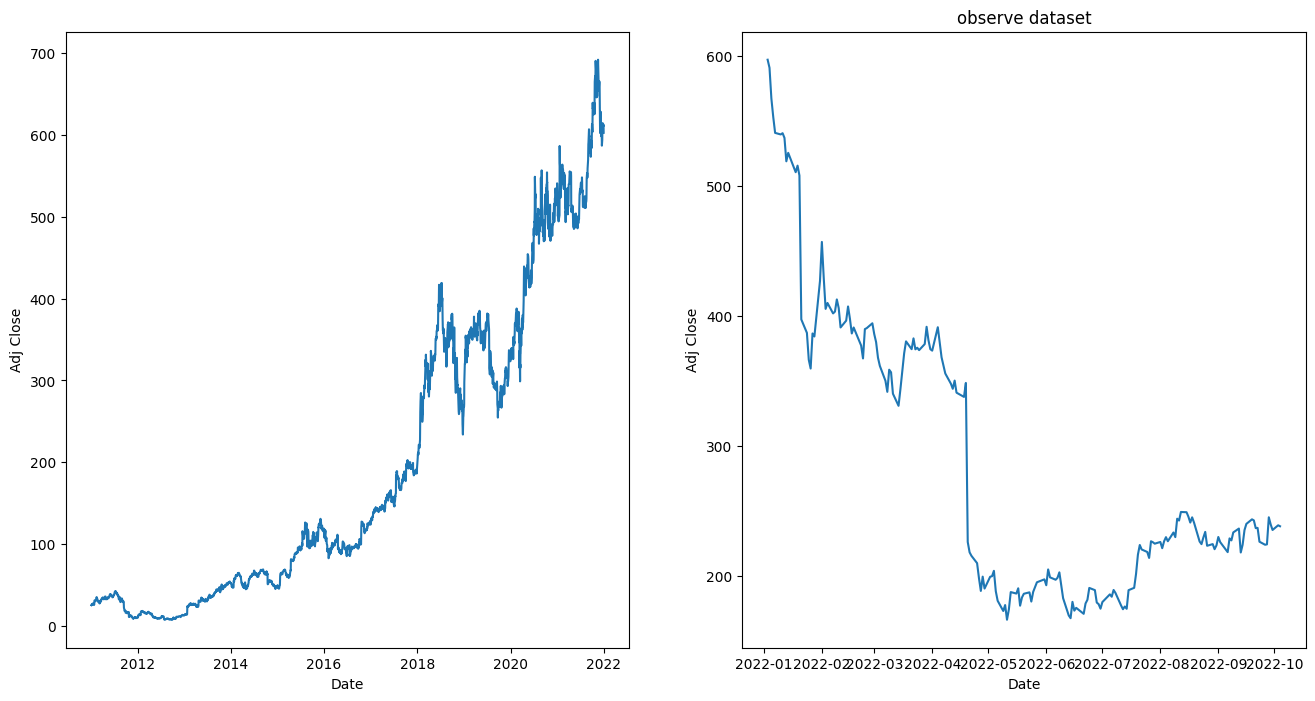

In [39]:
train.index = pd.to_datetime(train.index,format='%Y-%m-%d')
test.index = pd.to_datetime(test.index,format='%Y-%m-%d')
# y_max = max(max(train.apply(max)),max(test.apply(max)))
# y_max = y_max+y_max*0.1
fig, ax = plt.subplots(1, 2, figsize=(16, 8), dpi=100)
sns.lineplot(data=train['Adj Close'],ax=ax[0])
sns.lineplot(data=test['Adj Close'],ax=ax[1])
# ax[0].set_ylim(0,y_max)
# ax[1].set_ylim(0,y_max)
plt.title(f'observe dataset')
# plt.legend(loc='upper left')